## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import nltk
import neattext.functions as nfx
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

#!pip install neattext

## Data Pre-Processing

In [2]:
# Load the dataframe
raw_data = pd.read_csv('chatGPT_dataset.csv')

/var/folders/xv/m6j5wr551k9_nbn8yfyy24000000gn/T/ipykernel_69441/1066108768.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('chatGPT_dataset.csv')


In [3]:
raw_data.head(10)

,Date,UniqueID,UserName,IsVerified,Tweet,Location,Lang
0,12/1/22,1.600000e+18,askviable,False,The new #ChatGPT model by @OpenAI is astonishi...,NaN,en
1,12/1/22,1.600000e+18,mazen160,False,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,en
2,12/1/22,1.600000e+18,ZoumanaCisse6,False,i think i broke chatGPT. it's been frozen for ...,Bay area,en
3,12/1/22,1.600000e+18,DennisLibre,False,"I like ChatGPT as much as the next guy, but th...",Miami,en
4,12/1/22,1.600000e+18,golang_news,False,ChatGPT finds the race condition in a Go progr...,NaN,en
5,12/1/22,1.600000e+18,mpaepper,False,"It seems like sth. was changed here, because I...","Hamburg, Germany",en
6,12/1/22,1.600000e+18,AaronSitze,False,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",en
7,12/1/22,1.600000e+18,torkelo,False,ChatGPT is really amazing at taking a bizarre ...,Sweden,en
8,12/1/22,1.600000e+18,DontsitBigG,False,Seriously ! How are children going to learn wi...,"New York, USA",en
9,12/1/22,1.600000e+18,PryvitKyle,False,@by_caballero @john_c_palmer ChatGPT's respons...,"Auckland, NZ",en


In [4]:
raw_data.shape

(1047221, 7)

### Remove the duplicated rows

In [5]:
without_duplicate = raw_data.drop_duplicates(keep='first').copy()
without_duplicate.head(10)

,Date,UniqueID,UserName,IsVerified,Tweet,Location,Lang
0,12/1/22,1.600000e+18,askviable,False,The new #ChatGPT model by @OpenAI is astonishi...,NaN,en
1,12/1/22,1.600000e+18,mazen160,False,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,en
2,12/1/22,1.600000e+18,ZoumanaCisse6,False,i think i broke chatGPT. it's been frozen for ...,Bay area,en
3,12/1/22,1.600000e+18,DennisLibre,False,"I like ChatGPT as much as the next guy, but th...",Miami,en
4,12/1/22,1.600000e+18,golang_news,False,ChatGPT finds the race condition in a Go progr...,NaN,en
5,12/1/22,1.600000e+18,mpaepper,False,"It seems like sth. was changed here, because I...","Hamburg, Germany",en
6,12/1/22,1.600000e+18,AaronSitze,False,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",en
7,12/1/22,1.600000e+18,torkelo,False,ChatGPT is really amazing at taking a bizarre ...,Sweden,en
8,12/1/22,1.600000e+18,DontsitBigG,False,Seriously ! How are children going to learn wi...,"New York, USA",en
9,12/1/22,1.600000e+18,PryvitKyle,False,@by_caballero @john_c_palmer ChatGPT's respons...,"Auckland, NZ",en


In [6]:
without_duplicate.shape

(993471, 7)

In [7]:
raw_data.shape

(1047221, 7)

In [8]:
#check NA in precentage after duplicates are removed
(without_duplicate.isnull().sum()* 100 / len(without_duplicate)).round(2).sort_values(ascending = False)

# Since the Na values are less than 1% hence they can safely be removed (rule of thumb is 5%)

Location      27.85
Date           0.00
UniqueID       0.00
UserName       0.00
IsVerified     0.00
Tweet          0.00
Lang           0.00
dtype: float64

##### Location column has most percentage of null values.

<AxesSubplot:>

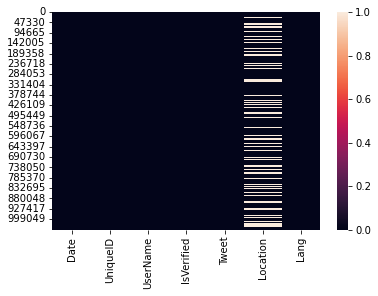

In [9]:
# DATA PREPROCESSING: Visualise NAs after removing duplicated rows in the form of pattern to see their location
sns.heatmap(without_duplicate.isnull(), cbar=True)

# Nas are located very sparse except for Location.

### Remove all NAs

In [10]:
# Drop the whole row that contains the empty cell
# Always assign the new dataframe

without_dup_na = without_duplicate.dropna(how= "any").copy()
(without_dup_na.isnull().sum()* 100 / len(without_dup_na)).round(2).sort_values(ascending = False)

Date          0.0
UniqueID      0.0
UserName      0.0
IsVerified    0.0
Tweet         0.0
Location      0.0
Lang          0.0
dtype: float64

In [11]:
without_dup_na.size

5017670

In [12]:
without_dup_na.head()

,Date,UniqueID,UserName,IsVerified,Tweet,Location,Lang
1,12/1/22,1.600000e+18,mazen160,False,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,en
2,12/1/22,1.600000e+18,ZoumanaCisse6,False,i think i broke chatGPT. it's been frozen for ...,Bay area,en
3,12/1/22,1.600000e+18,DennisLibre,False,"I like ChatGPT as much as the next guy, but th...",Miami,en
5,12/1/22,1.600000e+18,mpaepper,False,"It seems like sth. was changed here, because I...","Hamburg, Germany",en
6,12/1/22,1.600000e+18,AaronSitze,False,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",en


In [13]:
print(without_dup_na['Lang'].unique())

['en']


### Creating Dummies for IsVerified

In [14]:
dummies = pd.get_dummies(without_dup_na[['IsVerified']])

In [15]:
dummies = dummies.drop(['IsVerified_False'], axis=1)

### Dropping unwanted rows

In [16]:

df = pd.concat([without_dup_na.drop(['IsVerified','Lang', 'UniqueID'],axis=1), dummies],axis=1)

In [17]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0


In [18]:
without_dup_na.Location.value_counts()

United States                         11785
India                                 10515
London, England                        7474
San Francisco, CA                      7111
New York, NY                           6970
                                      ...  
midlands                                  1
St.Louis , Missouri                       1
A Yusful Obidient Nigeria ðŸ‡³ðŸ‡¬        1
she/her | 16 |                            1
The Blastzone                             1
Name: Location, Length: 94716, dtype: int64

In [19]:
df.IsVerified_True.value_counts().head(20)

0    687134
1     29676
Name: IsVerified_True, dtype: int64

## **Noise Removal**

- Remove mentions/userhandles

- Remove hashtags

- Remove urls

- Remove emojis

- Remove special characters

- Remove Stop words

In [20]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### Remove hashtags

In [21]:
df['Tweet'].apply(nfx.extract_hashtags)

1                                    []
2                                    []
3                                    []
5                                    []
6                                    []
                       ...             
1047207    [#TechTalk:, #AI, #GPT, #ML]
1047208                      [#ChatGPT]
1047211                              []
1047212                              []
1047213                              []
Name: Tweet, Length: 716810, dtype: object

In [22]:
df['extracted_hashtags'] = df['Tweet'].apply(nfx.extract_hashtags)

In [23]:
df['extracted_hashtags']

1                                    []
2                                    []
3                                    []
5                                    []
6                                    []
                       ...             
1047207    [#TechTalk:, #AI, #GPT, #ML]
1047208                      [#ChatGPT]
1047211                              []
1047212                              []
1047213                              []
Name: extracted_hashtags, Length: 716810, dtype: object

In [24]:
df['clean_tweet'] = df['Tweet'].apply(nfx.remove_hashtags)

In [25]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
1,@bitquark I am looking forward for a ChatGPT A...,@bitquark I am looking forward for a ChatGPT A...
2,i think i broke chatGPT. it's been frozen for ...,i think i broke chatGPT. it's been frozen for ...
3,"I like ChatGPT as much as the next guy, but th...","I like ChatGPT as much as the next guy, but th..."
5,"It seems like sth. was changed here, because I...","It seems like sth. was changed here, because I..."
6,I know ChatGPT is just crawling for inputs. \n...,I know ChatGPT is just crawling for inputs. \n...
...,...,...
1047207,#TechTalk: We asked ChatGPT to explain Bitcoin...,We asked ChatGPT to explain Bitcoin like a 1...
1047208,@WhaleChart there is always $chip @askChipAi n...,@WhaleChart there is always $chip @askChipAi n...
1047211,@NNovaDefi @thy_crypto I agree... The advantag...,@NNovaDefi @thy_crypto I agree... The advantag...
1047212,@WDBTHtGP This reads like ChatGPT was this Cha...,@WDBTHtGP This reads like ChatGPT was this Cha...


### Remove userhandles (@)

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [27]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
1,@bitquark I am looking forward for a ChatGPT A...,"I am looking forward for a ChatGPT API, I ca..."
2,i think i broke chatGPT. it's been frozen for ...,i think i broke chatGPT. it's been frozen for ...
3,"I like ChatGPT as much as the next guy, but th...","I like ChatGPT as much as the next guy, but th..."
5,"It seems like sth. was changed here, because I...","It seems like sth. was changed here, because I..."
6,I know ChatGPT is just crawling for inputs. \n...,I know ChatGPT is just crawling for inputs. \n...
...,...,...
1047207,#TechTalk: We asked ChatGPT to explain Bitcoin...,We asked ChatGPT to explain Bitcoin like a 1...
1047208,@WhaleChart there is always $chip @askChipAi n...,there is always $chip new on telegram â...
1047211,@NNovaDefi @thy_crypto I agree... The advantag...,I agree... The advantage is huge... Today ...
1047212,@WDBTHtGP This reads like ChatGPT was this Cha...,This reads like ChatGPT was this ChatGPT lolol


In [28]:
df['clean_tweet'].iloc[10]

'      ChatGPT keeps it real ðŸ˜€ ... https://t.co/3aZo8F6hu4'

In [29]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

### Remove urls

In [30]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [31]:
df['clean_tweet'].iloc[10]

' ChatGPT keeps it real ðŸ˜€ ... '

### Remove Punctuations

In [32]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [33]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
1,@bitquark I am looking forward for a ChatGPT A...,I am looking forward for a ChatGPT API I can ...
2,i think i broke chatGPT. it's been frozen for ...,i think i broke chatGPT its been frozen for a ...
3,"I like ChatGPT as much as the next guy, but th...",I like ChatGPT as much as the next guy but the...
5,"It seems like sth. was changed here, because I...",It seems like sth was changed here because I c...
6,I know ChatGPT is just crawling for inputs. \n...,I know ChatGPT is just crawling for inputs \n\...
...,...,...
1047207,#TechTalk: We asked ChatGPT to explain Bitcoin...,We asked ChatGPT to explain Bitcoin like a 19...
1047208,@WhaleChart there is always $chip @askChipAi n...,there is always $chip new on telegram â¤ï¸â...
1047211,@NNovaDefi @thy_crypto I agree... The advantag...,I agree The advantage is huge Today in my cla...
1047212,@WDBTHtGP This reads like ChatGPT was this Cha...,This reads like ChatGPT was this ChatGPT lolol


### Remove special_characters

In [34]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

In [35]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
1,@bitquark I am looking forward for a ChatGPT A...,I am looking forward for a ChatGPT API I can ...
2,i think i broke chatGPT. it's been frozen for ...,i think i broke chatGPT its been frozen for a ...
3,"I like ChatGPT as much as the next guy, but th...",I like ChatGPT as much as the next guy but the...
5,"It seems like sth. was changed here, because I...",It seems like sth was changed here because I c...
6,I know ChatGPT is just crawling for inputs. \n...,I know ChatGPT is just crawling for inputs nnE...
...,...,...
1047207,#TechTalk: We asked ChatGPT to explain Bitcoin...,We asked ChatGPT to explain Bitcoin like a 19...
1047208,@WhaleChart there is always $chip @askChipAi n...,there is always chip new on telegram
1047211,@NNovaDefi @thy_crypto I agree... The advantag...,I agree The advantage is huge Today in my cla...
1047212,@WDBTHtGP This reads like ChatGPT was this Cha...,This reads like ChatGPT was this ChatGPT lolol


In [36]:
df['clean_tweet'].loc[1047208]

' there is always chip new on telegram '

In [37]:
df['clean_tweet'].iloc[10]

' ChatGPT keeps it real   '

In [38]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [39]:
df['clean_tweet'].iloc[10]

' ChatGPT keeps it real '

In [40]:
df['clean_tweet'].iloc[100000]

' One potential impact is that chatGPT could be used to create more sophisticated phishing attacks By generating convincing messages that mimic human communication attackers could trick pe'

### Remove non_ascii

In [41]:
 # Cleaning Text: non_ascii
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_non_ascii)

In [42]:
df[['Tweet','clean_tweet']]

,Tweet,clean_tweet
1,@bitquark I am looking forward for a ChatGPT A...,I am looking forward for a ChatGPT API I can ...
2,i think i broke chatGPT. it's been frozen for ...,i think i broke chatGPT its been frozen for a ...
3,"I like ChatGPT as much as the next guy, but th...",I like ChatGPT as much as the next guy but the...
5,"It seems like sth. was changed here, because I...",It seems like sth was changed here because I c...
6,I know ChatGPT is just crawling for inputs. \n...,I know ChatGPT is just crawling for inputs nnE...
...,...,...
1047207,#TechTalk: We asked ChatGPT to explain Bitcoin...,We asked ChatGPT to explain Bitcoin like a 19...
1047208,@WhaleChart there is always $chip @askChipAi n...,there is always chip new on telegram
1047211,@NNovaDefi @thy_crypto I agree... The advantag...,I agree The advantage is huge Today in my cla...
1047212,@WDBTHtGP This reads like ChatGPT was this Cha...,This reads like ChatGPT was this ChatGPT lolol


In [43]:
df['clean_tweet'].loc[1047211]

' I agree The advantage is huge Today in my classroom none of my centennial students knew chatGPT or web3 I also began to think about how far many people are from this world'

### Convert to Lowercase

In [44]:
df['clean_tweet'] = df['clean_tweet'].apply(str.lower)

In [45]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],i am looking forward for a chatgpt api i can ...
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],i think i broke chatgpt its been frozen for a ...
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],i like chatgpt as much as the next guy but the...
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],it seems like sth was changed here because i c...
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],i know chatgpt is just crawling for inputs nne...


### Remove Stopwords

In [46]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

In [47]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],looking forward chatgpt api lot tools built
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],think broke chatgpt frozen couple minutes
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],like chatgpt guy theres twitter im looking guy...
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],like sth changed replicate behavior chatgpt re...
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],know chatgpt crawling inputs nneven makes sad ...


### Removal of extra stop words

In [48]:
extraStopwords=['chatgpt','chat','gpt','chatbot','bot','ai']

In [49]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in extraStopwords))

In [50]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],looking forward api lot tools built
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],think broke frozen couple minutes
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],like guy theres twitter im looking guy tweets ...
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],like sth changed replicate behavior refuses wr...
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],know crawling inputs nneven makes sad vision e...


### Tokenization

In [51]:
df['tokenized_tweet'] = df['clean_tweet'].apply(nltk.word_tokenize)

In [52]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet,tokenized_tweet
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],looking forward api lot tools built,"[looking, forward, api, lot, tools, built]"
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],think broke frozen couple minutes,"[think, broke, frozen, couple, minutes]"
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],like guy theres twitter im looking guy tweets ...,"[like, guy, theres, twitter, im, looking, guy,..."
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],like sth changed replicate behavior refuses wr...,"[like, sth, changed, replicate, behavior, refu..."
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],know crawling inputs nneven makes sad vision e...,"[know, crawling, inputs, nneven, makes, sad, v..."


### Lemmatization and Stemming

#### Stemming and Lemmatization Functions

In [53]:
def df_lemmatize(row):
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in row]
    return lemma_words

def stem_words(row):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in row]
    return stemmed_words

In [54]:
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(df_lemmatize)
df['stemmed_tweet'] = df['tokenized_tweet'].apply(stem_words)

In [55]:
df.head()

,Date,UserName,Tweet,Location,IsVerified_True,extracted_hashtags,clean_tweet,tokenized_tweet,lemmatized_tweet,stemmed_tweet
1,12/1/22,mazen160,@bitquark I am looking forward for a ChatGPT A...,At a server near you.,0,[],looking forward api lot tools built,"[looking, forward, api, lot, tools, built]","[looking, forward, api, lot, tools, built]","[look, forward, api, lot, tool, built]"
2,12/1/22,ZoumanaCisse6,i think i broke chatGPT. it's been frozen for ...,Bay area,0,[],think broke frozen couple minutes,"[think, broke, frozen, couple, minutes]","[think, broke, frozen, couple, minutes]","[think, broke, frozen, coupl, minut]"
3,12/1/22,DennisLibre,"I like ChatGPT as much as the next guy, but th...",Miami,0,[],like guy theres twitter im looking guy tweets ...,"[like, guy, theres, twitter, im, looking, guy,...","[like, guy, theres, twitter, im, looking, guy,...","[like, guy, there, twitter, im, look, guy, twe..."
5,12/1/22,mpaepper,"It seems like sth. was changed here, because I...","Hamburg, Germany",0,[],like sth changed replicate behavior refuses wr...,"[like, sth, changed, replicate, behavior, refu...","[like, sth, changed, replicate, behavior, refu...","[like, sth, chang, replic, behavior, refus, wr..."
6,12/1/22,AaronSitze,I know ChatGPT is just crawling for inputs. \n...,"Illinois, USA",0,[],know crawling inputs nneven makes sad vision e...,"[know, crawling, inputs, nneven, makes, sad, v...","[know, crawling, inputs, nneven, makes, sad, v...","[know, crawl, input, nneven, make, sad, vision..."


In [56]:
df.shape

(716810, 10)

In [57]:
df.to_excel('CleanedData.xlsx', index=False)